In [1]:
#!pip install seaborn
#%pip uninstall seaborn -y
#pip install seaborn
import seaborn as sns
from __future__ import division
import pandas as pd
import numpy as np
import logging
import math
import time
import statistics as stats
import json
from datetime import datetime, timedelta
import os, sys
import matplotlib.pyplot as plt
import glob

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import scale, normalize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [2]:
feature_file_path = "features/vag_features.csv"
f_df = pd.read_csv(feature_file_path)
print(f_df.head(2))

   STATE        FD    FD_EXT    FD_FLX       VMS       VMS_EXT       VMS_FLX  \
0      1  1.714624 -1.953987 -1.893786  0.003594  7.705657e-09  5.391020e-08   
1      1  1.876535 -2.437410 -2.631023  0.017189  2.282283e-08  4.681395e-08   

            LI      LI_EXT      LI_FLX  
0   684.049676   74.933167  103.381055  
1  1746.572715  154.270082  159.203130  


In [7]:
# KNN
data = f_df.copy()
# labels
y = np.array(data["STATE"], dtype=np.int32)  # Convert labels to int32
# data
X = data.drop(columns=["STATE"])

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=42)

# scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("confusion matrix")
print(conf_matrix)
print(class_report)

Accuracy: 0.9111111111111111
Precision: 0.8787878787878788
Recall: 1.0
confusion matrix
[[12  4]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.88      1.00      0.94        29

    accuracy                           0.91        45
   macro avg       0.94      0.88      0.90        45
weighted avg       0.92      0.91      0.91        45



Text(0, 0.5, 'Accuracy Score')

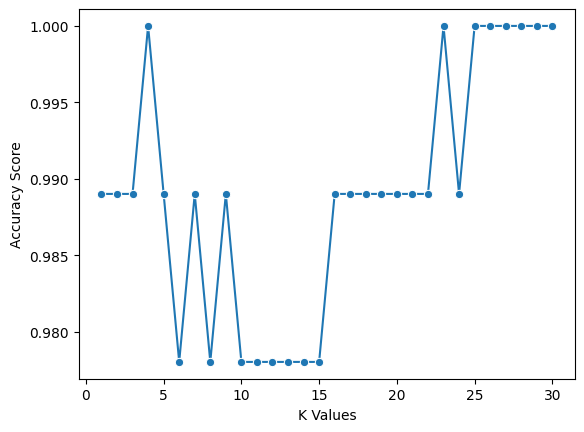

In [4]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=7)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [10]:
actual_groups = f_df["STATE"].to_numpy()
print(actual_groups)

features_wo_group = f_df.copy()
features_wo_group = features_wo_group.drop(["STATE"], axis=1)
print(features_wo_group.head(2))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
         FD    FD_EXT    FD_FLX       VMS       VMS_EXT       VMS_FLX  \
0  1.714624 -1.953987 -1.893786  0.003594  7.705657e-09  5.391020e-08   
1  1.876535 -2.437410 -2.631023  0.017189  2.282283e-08  4.681395e-08   

            LI      LI_EXT      LI_FLX  
0   684.049676   74.933167  103.381055  
1  1746.572715  154.270082  159.203130  


In [26]:
#data_scaled = features_wo_group

# scale data?
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features_wo_group)

kmeans = KMeans(n_clusters=2, random_state=42, max_iter=300).fit(data_scaled)
print(f"predicted groups: {kmeans.labels_}")
print(f"actual groups:    {actual_groups}")

k_means_class0 = [x for x in kmeans.labels_ if x == 0]
k_means_class1 = [x for x in kmeans.labels_ if x == 1]
print()
print(f"number of 0's: {len(k_means_class0)}")
print(f"number of 1's: {len(k_means_class1)}")

correct = []
num_correct = 0
for i in range(0, len(kmeans.labels_)):
    if(kmeans.labels_[i] == actual_groups[i]):
        correct.append(True)
        num_correct += 1
    else:
        correct.append(False)
print()
print(correct)
print(f" num of correct: {num_correct}")

predicted groups: [1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
actual groups:    [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

number of 0's: 25
number of 1's: 64

[True, False, False, True, False, True, False, False, True, False, True, False, True, True, True, True, True, True, False, False, True, False, True, True, True, False, True, False, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True,

In [10]:
pca = PCA(n_components=2)
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(metrics_wo_patients)
X_pca = pca.fit_transform(data_scaled)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, index=features_wo_group.columns, columns=['PC1', 'PC2'])

print(loading_df)

                  PC1           PC2
FD       8.065379e-01 -1.427435e+00
FD_EXT  -6.397825e-03 -4.035331e-02
FD_FLX  -2.616709e-02 -1.656775e-02
VMS      3.201013e-03 -1.489719e-03
VMS_EXT -4.880835e-08  9.842435e-08
VMS_FLX -1.193802e-08 -4.046786e-08
LI       5.081093e+02 -2.728823e+00
LI_EXT   3.857769e+01  1.871710e+01
LI_FLX   4.398351e+01  1.513359e+01


/home/mike/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


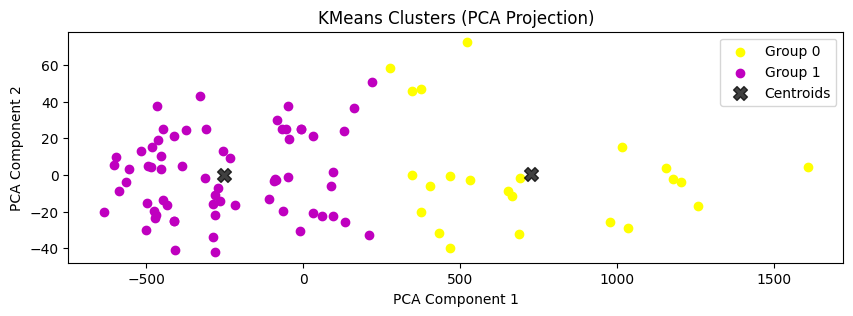

In [11]:
# Create a scatter plot
plt.figure(figsize=(10, 3))

# Define colors for each group
colors = {0: 'yellow', 1: 'm', 2: 'c', 3:'b', 4:'r'}  # Add more colors if you have more groups

# Plot each group with its corresponding color
for group in np.unique(kmeans.labels_):
    plt.scatter(X_pca[kmeans.labels_ == group, 0], 
                X_pca[kmeans.labels_ == group, 1], 
                color=colors[group], 
                label=f'Group {group}')

# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=100, alpha=0.75, marker='X', label='Centroids')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters (PCA Projection)')

# Add legend
plt.legend()
plt.show()